# CHAPTER 7: CORRELATION AND REGRESSION ANALYSIS
**(Week 13: Lecture Notes)**

---

## 1. INTRODUCTION: RELATIONSHIP BETWEEN VARIABLES
In engineering, systems do not depend on a single parameter. Variables affect each other.

*   **If Temperature increases** $\rightarrow$ Metal expands.
*   **If Speed increases** $\rightarrow$ Fuel consumption changes.

In this chapter, we will answer two fundamental questions:
1.  **Correlation:** Do the two variables move together? How strong is the relationship?
2.  **Regression:** Can we formulate this relationship and predict the future?

---

## 2. COVARIANCE (Direction of Relationship)
Before moving to correlation, we must understand the cornerstone of the relationship: **Covariance**.

### 2.1. What is Covariance? ($S_{xy}$)
It measures how the deviations of two variables (x and y) from their means change together.

**The Logic:**
*   **Positive Covariance:** As x increases, y also increases (Move together).
*   **Negative Covariance:** As x increases, y decreases (Inverse movement).
*   **Zero Covariance:** No relationship between them (Independent).

**The Problem:** Covariance depends on units.
*   If you take length in "meters", covariance is small; if "millimeters", it is huge.
*   Therefore, we cannot use Covariance to compare the strength of the relationship. We need a "standardized" measure. That is **Correlation**.

---

## 3. CORRELATION ANALYSIS (Strength of Relationship)
It is the unit-free (normalized) version of covariance.

### 3.1. Pearson Correlation Coefficient ($r$)
A coefficient ranging from -1 to +1 that measures the direction and intensity of the relationship.

**Formula:**
$$ r = \frac{Covariance(x,y)}{StdDev(x) \times StdDev(y)} $$
$$ r = \frac{S_{xy}}{\sqrt{S_{xx}} \times \sqrt{S_{yy}}} $$

**Interpretation:**
*   $r = +1$: Perfect Positive Relationship.
*   $r = -1$: Perfect Negative Relationship.
*   $r = 0$: No Relationship.


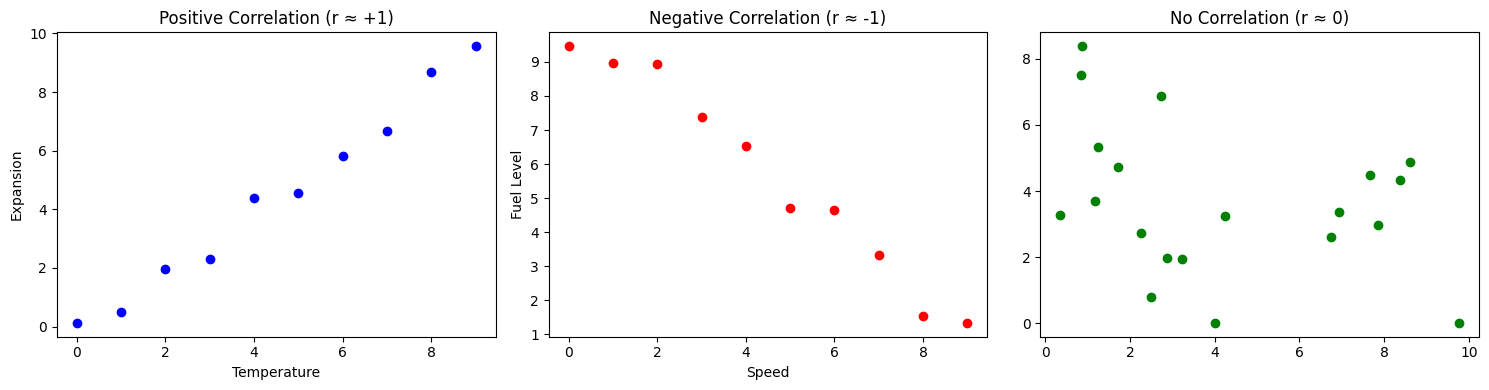

In [1]:
import matplotlib.pyplot as plt
import random

# Visualization of Different Correlations
plt.figure(figsize=(15, 4))

# 1. Positive Correlation
x1 = list(range(10))
y1 = [i + random.uniform(-1, 1) for i in x1]
plt.subplot(1, 3, 1)
plt.scatter(x1, y1, color='blue')
plt.title("Positive Correlation (r ≈ +1)")
plt.xlabel("Temperature"); plt.ylabel("Expansion")

# 2. Negative Correlation
x2 = list(range(10))
y2 = [10 - i + random.uniform(-1, 1) for i in x2]
plt.subplot(1, 3, 2)
plt.scatter(x2, y2, color='red')
plt.title("Negative Correlation (r ≈ -1)")
plt.xlabel("Speed"); plt.ylabel("Fuel Level")

# 3. Zero Correlation
x3 = [random.uniform(0, 10) for _ in range(20)]
y3 = [random.uniform(0, 10) for _ in range(20)]
plt.subplot(1, 3, 3)
plt.scatter(x3, y3, color='green')
plt.title("No Correlation (r ≈ 0)")

plt.tight_layout()
plt.show()


### 3.2. Outlier Warning
Correlation is very sensitive to Outliers.

*   **Example:** Imagine a perfect line of 100 data points ($r=1$). If you add just one single erroneous "extreme" data point (outlier), the $r$ value can suddenly drop to 0.5.
*   **Lesson:** Do not trust the $r$ value alone without seeing the graph (Scatter Plot).

### 3.3. The Causality Trap
**"Correlation does not imply Causation."**

**Classic Example:**
In a research conducted during summer months:
1.  Ice Cream Sales increase.
2.  Drowning Cases increase.
*   **Correlation:** $r = 0.8$ (Very high).

**Question:** Does eating ice cream cause drowning?
**Answer:** No! There is a common hidden cause increasing both: **TEMPERATURE**.
*(As engineers, finding correlation is not enough; we must understand the mechanism).*

---

## 4. SIMPLE LINEAR REGRESSION (Model Building)
If there is a relationship, we want to turn it into a mathematical function.

### 4.1. Real Life Model (With Error Term)
No relationship in nature is straight as if drawn by a ruler. There is always a deviation.
**True Model:**
$$ y = \beta_0 + \beta_1x + \epsilon $$
*   $y$: Dependent variable (Output).
*   $x$: Independent variable (Input).
*   $\beta_0, \beta_1$: True coefficients.
*   $\epsilon$ (Epsilon): **Error Term (Noise)**. Random effects we cannot measure or know.

### 4.2. Prediction Model (What We Find)
We cannot know $\epsilon$, we only estimate. Our equation:
$$ \hat{y} = b_0 + b_1x $$
*   $\hat{y}$: Predicted value.
*   $b_0$ (Intercept): Where the line cuts the y-axis.
*   $b_1$ (Slope): How much $y$ increases if $x$ increases by one unit.

### 4.3. Model Assumptions (LINE Rule)
To use these formulas, the data must meet these conditions:
1.  **L**inearity: The relationship must really be linear (Not curved).
2.  **I**ndependence: Errors must be independent of each other.
3.  **N**ormality: Errors ($\epsilon$) must follow a Normal Distribution.
4.  **E**qual Variance: The size of errors should not grow as $x$ changes (Must remain constant).

---

## 5. CALCULATING COEFFICIENTS (Least Squares)
The goal is to find the line that minimizes the sum of squared distances to the points.

**Slope ($b_1$) Formula:**
$$ b_1 = \frac{S_{xy}}{S_{xx}} $$

**Intercept ($b_0$) Formula:**
$$ b_0 = \bar{y} - (b_1 \times \bar{x}) $$

---

## 6. RESIDUALS AND MODEL CHECK
We built the model, but is it good? We look at **Residuals (Errors)**.

**Definition:**
$$ Residual (e) = Real Value (y) - Predicted Value (\hat{y}) $$

**Residual Analysis:**
When we plot residuals, we should see a random cloud.
*   If there is a "U shape" or "Expanding funnel shape" in residuals, your model is **WRONG**. (Linear model is not suitable).


## 7. STEP-BY-STEP NUMERICAL EXAMPLE
An engineer measures the relationship between **Bitumen Ratio (x)** and **Hardness (y)** in asphalt.

**Data:**
*   $x$: 2, 3, 4, 5, 6
*   $y$: 20, 24, 30, 32, 40

### STEP 1: Summary Statistics
*   Mean $\bar{x} = 4$
*   Mean $\bar{y} = 29.2$

### STEP 2: Calculate Variations (S)
*(Note: Sum of squares is found via table method)*

| x (Bitumen) | y (Hardness) | $x - \bar{x}$ | $y - \bar{y}$ | $(x - \bar{x})^2$ | $(x - \bar{x})(y - \bar{y})$ |
| :--- | :--- | :--- | :--- | :--- | :--- |
| 2 | 20 | -2 | -9.2 | 4 | 18.4 |
| 3 | 24 | -1 | -5.2 | 1 | 5.2 |
| 4 | 30 | 0 | 0.8 | 0 | 0 |
| 5 | 32 | 1 | 2.8 | 1 | 2.8 |
| 6 | 40 | 2 | 10.8 | 4 | 21.6 |
| **Sum** | | | | **10** ($S_{xx}$) | **48** ($S_{xy}$) |

### STEP 3: Find Slope and Intercept
*   **Slope ($b_1$):** $48 / 10 = \mathbf{4.8}$
    *   *(Comment: If bitumen increases by 1%, hardness increases by 4.8 points).*
*   **Intercept ($b_0$):** $29.2 - (4.8 \times 4) = 29.2 - 19.2 = \mathbf{10}$

### STEP 4: Equation
$$ y = 10 + 4.8x $$

**Prediction:**
What happens if Bitumen ratio is 7?
$$ y = 10 + (4.8 \times 7) = 43.6 $$


--- RESULTS ---
Slope (b1): 4.80
Intercept (b0): 10.00
Equation: y = 10.0 + 4.8x
Prediction for x=7: 43.6


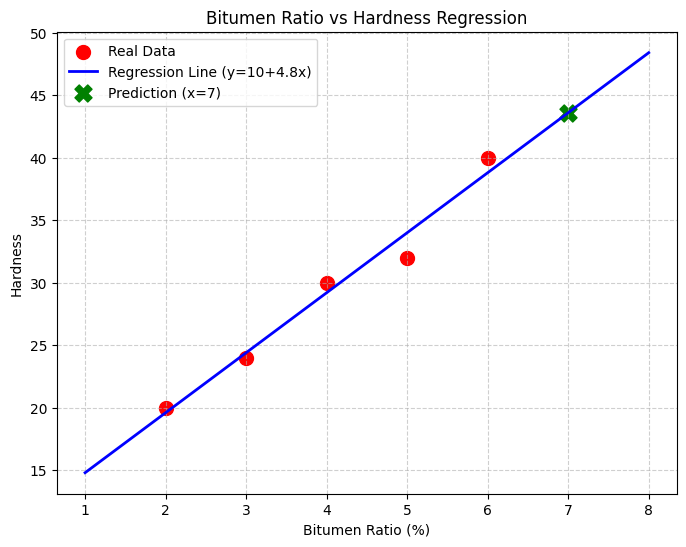

In [2]:
# --- ASPHALT PROBLEM CODE ---
import matplotlib.pyplot as plt

# Data
x_vals = [2, 3, 4, 5, 6]
y_vals = [20, 24, 30, 32, 40]

# 1. Calculate Means
n = len(x_vals)
x_bar = sum(x_vals) / n
y_bar = sum(y_vals) / n

# 2. Calculate S_xx and S_xy
S_xx = sum([(xi - x_bar)**2 for xi in x_vals])
S_xy = sum([(xi - x_bar) * (yi - y_bar) for xi, yi in zip(x_vals, y_vals)])

# 3. Calculate Coefficients
b1 = S_xy / S_xx
b0 = y_bar - (b1 * x_bar)

print(f"--- RESULTS ---")
print(f"Slope (b1): {b1:.2f}")
print(f"Intercept (b0): {b0:.2f}")
print(f"Equation: y = {b0:.1f} + {b1:.1f}x")

# Prediction for x=7
pred_7 = b0 + b1 * 7
print(f"Prediction for x=7: {pred_7:.1f}")

# --- PLOTTING ---
# Generate line points for plotting
line_x = [1, 8] # range for drawing the line
line_y = [b0 + b1 * xi for xi in line_x]

plt.figure(figsize=(8, 6))
plt.scatter(x_vals, y_vals, color='red', s=100, label='Real Data')
plt.plot(line_x, line_y, color='blue', linewidth=2, label=f'Regression Line (y={b0:.0f}+{b1:.1f}x)')

# Show prediction point
plt.scatter([7], [pred_7], color='green', marker='X', s=150, label='Prediction (x=7)')

plt.title("Bitumen Ratio vs Hardness Regression")
plt.xlabel("Bitumen Ratio (%)")
plt.ylabel("Hardness")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


## 8. ADVANCED CONCEPTS (Vision Box)
Concepts you need to know as an engineer, although we won't calculate them in this course:

1.  **Confidence and Prediction Intervals:**
    The value $y = 43.6$ we found is a single point (Point Estimate). In real life we look at:
    *   **Confidence Interval:** "Average hardness is 95% likely to be between 42 and 45."
    *   **Prediction Interval:** "Hardness of a single sample is 95% likely to be between 40 and 47." (Prediction interval is always wider).

2.  **Multiple Regression:**
    Hardness is not only affected by bitumen. Temperature, aggregate size etc. also affect it.
    $$ y = b_0 + b_1x_1 + b_2x_2 + ... $$
    *(This is covered in Masters or Advanced Statistics).*

3.  **Coefficient of Determination ($R^2$):**
    Success of the model. If $R^2 = 0.90$, it means "Our formula explains 90% of the change in hardness, 10% is unknown factors".

---

## 9. Lecture Summary

1.  **Do Not Extrapolate:** Our data was between $x=2$ and $x=6$. Do not calculate for $x=50$ using this formula. Physical behavior may change in that region.
2.  **Check Correlation Visually:** $r$ might be 0.9, but data could be "parabolic" (U-shaped). Always draw the graph first.
3.  **Error Term:** $\epsilon$ (Epsilon) is the "measure of our ignorance" in engineering. Everything we couldn't include in the model is there.
